# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combine_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = combine_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combine_df.loc[combine_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_df = combine_df.loc[combine_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df[combine_df["Mouse ID"].isin(duplicates)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()


248

## Summary Statistics

In [7]:
combine_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Variance Tumor Volume":variance, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

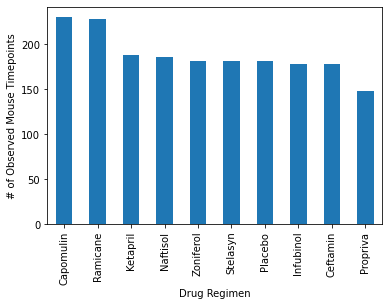

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar()  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

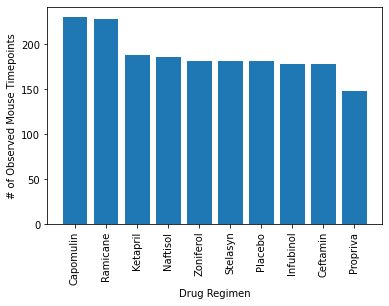

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

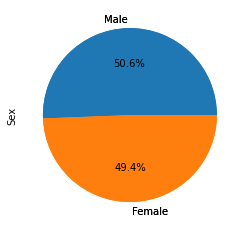

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = combine_df["Sex"].value_counts()
gender_data.plot.pie()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.gcf().set_facecolor('white')
# Make the pie chart
plt.show()

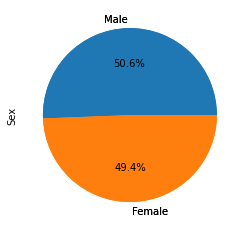

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = combine_df["Sex"].value_counts()
gender_data.plot.pie()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.gcf().set_facecolor('white')
# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_results = clean_df[clean_df['Drug Regimen'].isin(regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_results.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, filtered_results, on=['Mouse ID', 'Timepoint'], how='left')
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
all_outliers = []

# Loop through each treatment to identify potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_df = clean_df.loc[clean_df["Drug Regimen"] == treatment]
    last_timepoint = regimen_df.groupby('Mouse ID')['Timepoint'].max()
    last_timepoint_df = last_timepoint.reset_index()
    final_tumor_vol = pd.merge(last_timepoint_df, clean_df, on=("Mouse ID", "Timepoint"), how="left")
    tumor_volumes = final_tumor_vol["Tumor Volume (mm3)"]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outlier bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Reset index to remove Mouse ID and display just the data
    outliers = outliers.reset_index(drop=True)
    
    # Print the results
    print(f"{treatment}'s potential outliers: {outliers}\n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 0    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



<Figure size 720x432 with 0 Axes>

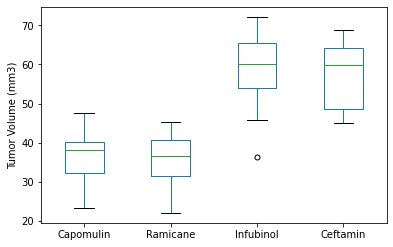

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_results = clean_df[clean_df['Drug Regimen'].isin(treatments)]

last_timepoint = filtered_results.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume = pd.merge(last_timepoint, filtered_results, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume['Drug Regimen'] = pd.Categorical(final_tumor_volume['Drug Regimen'], categories=treatments, ordered=True)
plt.figure(figsize=(10, 6))
flierprops = dict(marker='o', color='red', markersize=5)
final_tumor_volume.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, flierprops=flierprops)
plt.title('')
plt.suptitle('')  
plt.xlabel('')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

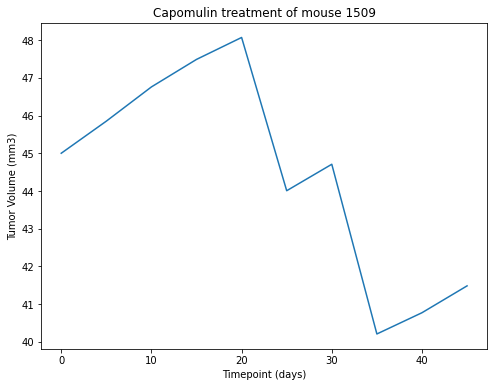

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_results = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
single_mouse_id = 'l509'
single_mouse_data = capomulin_results[capomulin_results['Mouse ID'] == single_mouse_id]
plt.figure(figsize=(8, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse 1509')
plt.grid(False)
plt.show()

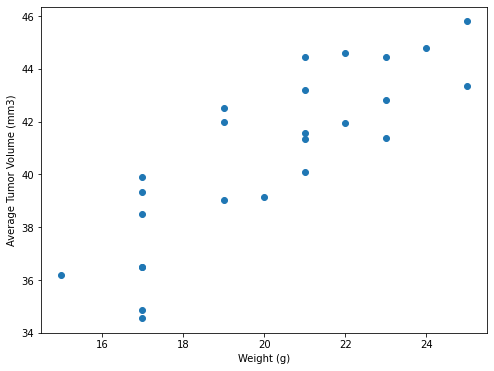

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_results = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_results.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'}, inplace=True)
capomulin_combined = pd.merge(avg_tumor_vol, mouse_metadata, on='Mouse ID')
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_combined['Weight (g)'], capomulin_combined['Avg Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('')
plt.show()

## Correlation and Regression

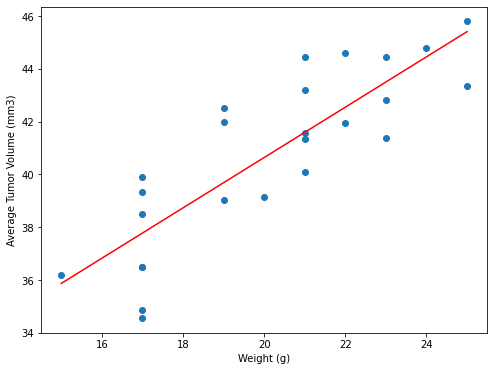

In [30]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_results = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_results.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'}, inplace=True)
capomulin_combined = pd.merge(avg_tumor_vol, mouse_metadata, on='Mouse ID')
x = capomulin_combined['Weight (g)']
y = capomulin_combined['Avg Tumor Volume (mm3)']
slope = (len(x) * sum(x*y) - sum(x) * sum(y)) / (len(x) * sum(x*x) - sum(x)**2)
intercept = (sum(y) - slope * sum(x)) / len(x)
x_values = pd.Series([x.min(), x.max()])
y_values = intercept + slope * x_values
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data')
plt.plot(x_values, y_values, color='red', label='Fit')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('')
plt.show()